In [1]:
import sys

assert sys.version_info >= (3, 7)

In [5]:
from packaging import version
from sklearn.datasets import load_iris # load_iris dataset
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

- Decision Tree는 White box(직관적이고 결정 방식을 이해하기 쉬움) model에 속함.
- Black box model : Random forest, Neural network

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Train and visualize Decision Tree
- GINI Impurity를 통해 올바른 결정을 했는지 판단.
- G = 1 - (sum(right sample/total))**2
- Info-theory에 사용되는 Disorder(D)도 성능 지표로 쓰임.

In [30]:
from sklearn.datasets import load_iris # Picture 6-1
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris) # Fit to the model

DecisionTreeClassifier(max_depth=2, random_state=42)

In [13]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[1] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="gini = 0.043\\nsamples = 46\\nvalue = [0, 1, 45]"] ;\n2 -> 4 ;\n}'

# Estimating Class Proabilites
- Decision Tree는 Class에 속할 P도 구할 수 있음.


In [16]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [17]:
tree_clf.predict([[5, 1.5]])

array([1])

# CART(Classification And Regression Tree) Algorithm
- Nonparametric model : 훈련(탐색) 전에는 어떤 parameter을 사용할 지 결정되지 않음
- Gini Criterion(in-purity)를 기준으로 feature을 나누고 이진 분류함.
- Decision Tree은 이진 분류이므로 탐색 시간은 매우 짧은 약 O(log2(m))이다.
- So, V(train) is high, but V(prediction) is low
- 최적의 경계를 찾기 어렵다는, NP-Complete 문제가 있으며, 이를 Heuristic(경험적) 방법으로 해결

# Regularization Hyperparameters
- Decision Tree는 train data에 대한 제약이 거의 없어서, model은 가장 train에 적합해지려는 성질이 있음. -> Overfitting 자주발생
- sklearn에서는 Depth, N(node), N(feature) 등의 Max 값을 제한함으로써 Regularization함.

In [31]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
# Regularizated model
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

<center>
<img src='https://drive.google.com/uc?id=1EdWf_c_OzKE6ulXpIDxPeQ9nLMrlpUHY'>
<center>

In [21]:
# Regularized model이 test에서 더 좋은 점수를 얻는 모습
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test), tree_clf2.score(X_moons_test, y_moons_test)

(0.898, 0.92)

# Sensitivity to axis orientation
- P) Boundary의 방향에는 매우 민감함.
- S) Scaling, PCA 변한을 적용

# _Practice 7. Train and fine-tune a Decision Tree for the moons dataset._

In [2]:
from sklearn import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

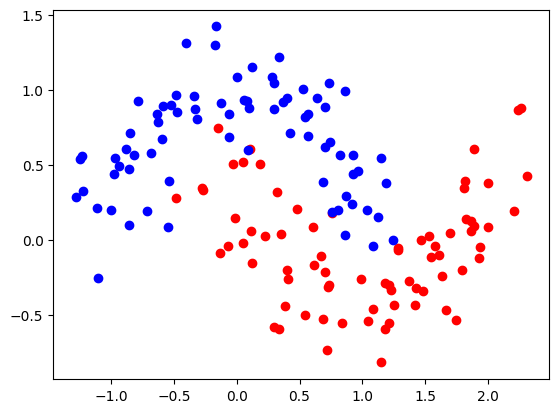

In [33]:
plt.plot(X_moons[y_moons==1,0],X_moons[y_moons==1,1],marker='o',linestyle='',color='red')
plt.plot(X_moons[y_moons==0,0],X_moons[y_moons==0,1],marker='o',linestyle='',color='blue')
plt.show()

In [34]:
# Train_test_split()을 이용해 Train, Test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [35]:
# Train과 Test가 4:1 비율로 분할된 모습
np.shape(X_train), np.shape(X_test)

((120, 2), (30, 2))

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021))
from sklearn.model_selection import GridSearchCV

param_range1 = [3, 4, 5, 6, 7, 8, 9]# 최적의 max_leaf_nodes
param_range2 = ['gini', 'entropy'] # 최적의 Inpurity Criteria

param_grid = [{'decisiontreeclassifier__max_leaf_nodes': param_range1,
              'decisiontreeclassifier__criterion': param_range2}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(X_train, y_train)

In [65]:
gs.best_score_ # Tuning 성공...!

0.9249999999999998

In [66]:
gs.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_leaf_nodes': 7}

# _Practice 8. RandomForest_

a. size=100인 Training subset을 1,000개 생성하기

In [70]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=40)

In [87]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1000, train_size=0.2, random_state=0)

In [88]:
ss.get_n_splits(X_moons)

1000

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(DecisionTreeClassifier, X_moons, y_moons, cv=ss)